In [1]:
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import  clear_output
import time
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

## Using Singualar Value Decomposition

Lets use a toy matrix we create and understand the application of SVD

In [12]:
toy_example = np.array([[1,2,3],
                       [2,5,8],
                       [3,4,9],
                       ],dtype=np.float32)

In [13]:
u, s, vh = svd(toy_example)

Lets look at S (singular values) U and Vh matrices

In [14]:
s

array([14.546,  1.167,  0.236], dtype=float32)

In [15]:
u

array([[-0.256, -0.235, -0.938],
       [-0.661, -0.665,  0.347],
       [-0.706,  0.709,  0.015]], dtype=float32)

In [16]:
vh

array([[-0.254, -0.456, -0.853],
       [ 0.48 , -0.825,  0.299],
       [-0.84 , -0.333,  0.428]], dtype=float32)

In [17]:
np.diag(s)

array([[14.546,  0.   ,  0.   ],
       [ 0.   ,  1.167,  0.   ],
       [ 0.   ,  0.   ,  0.236]], dtype=float32)

Lets reconstruct the toy example matrix using our U,S,Vh

In [18]:
u @ np.diag(s) @ vh

array([[1., 2., 3.],
       [2., 5., 8.],
       [3., 4., 9.]], dtype=float32)

We will now do ***Low Rank Approximation*** and see the matrix we get constructed

In [19]:
rank_k = 1
reconstructed_matrix = u[:, :rank_k] @ np.diag(s[:rank_k]) @ vh[:rank_k, :]

In [20]:
print(toy_example.shape,reconstructed_matrix.shape)

(3, 3) (3, 3)


In [21]:
reconstructed_matrix

array([[0.946, 1.7  , 3.177],
       [2.441, 4.387, 8.197],
       [2.606, 4.683, 8.751]], dtype=float32)

# Applying Low Rank Approximation

In [22]:
flower = plt.imread('flower.jpg')
flower.shape

(667, 1000, 3)

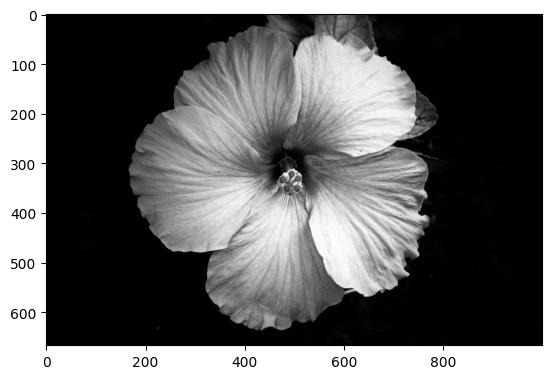

In [23]:
flower = flower[:,:, 0]  
plt.imshow(flower, cmap='gray');

In [24]:
u, s, vh = svd(flower)

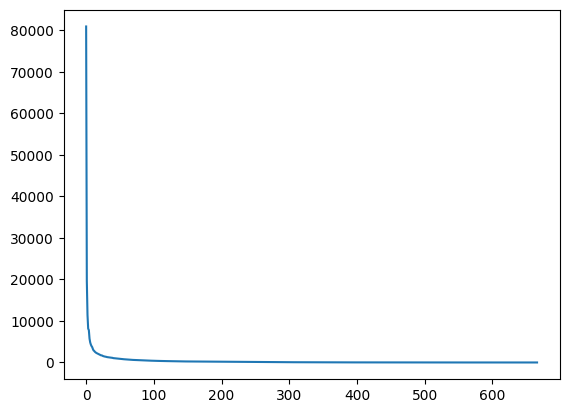

In [25]:
plt.plot(s);

In [26]:
len(s)

667

In [27]:
s[-10:]

array([0.412, 0.404, 0.386, 0.38 , 0.362, 0.335, 0.329, 0.309, 0.291,
       0.247], dtype=float32)

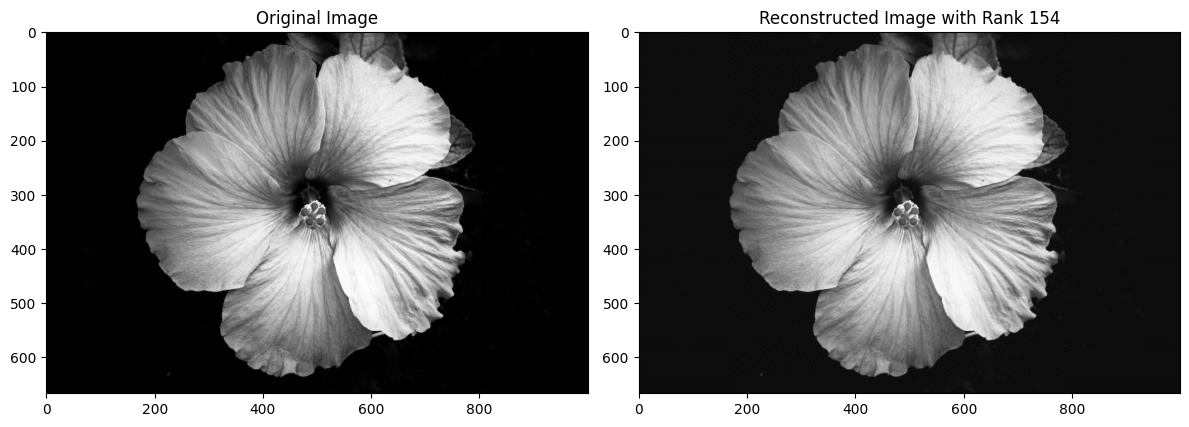

In [ ]:

for i in range(1,len(s)):
    clear_output(wait=True)
    rank_k = i
    cl = u[:, :rank_k] @ np.diag(s[:rank_k]) @ vh[:rank_k, :]
    # Create a figure with a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Display the first image in the first subplot
    axes[0].imshow(flower, cmap='gray')  
    axes[0].set_title('Original Image')  
    axes[1].imshow(cl, cmap='gray')  
    axes[1].set_title(f'Reconstructed Image with Rank {rank_k}')  
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()
    time.sleep(0.01)
   